In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.datasets import make_blobs

In [5]:
X,y=make_blobs(n_samples=1000, #datapoints
               centers=3, #clusters
               n_features=2) #columns

In [7]:
X

array([[  1.88590067,   9.20852027],
       [  0.77863405,   8.29645399],
       [  9.2736004 ,  10.30405516],
       ...,
       [  1.5394345 ,   9.29317515],
       [-10.28520841,   6.40290633],
       [  3.53272997,  10.12852734]], shape=(1000, 2))

In [8]:
y

array([2, 2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1,
       0, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1,
       2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1,
       0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2,
       0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1,
       0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0,

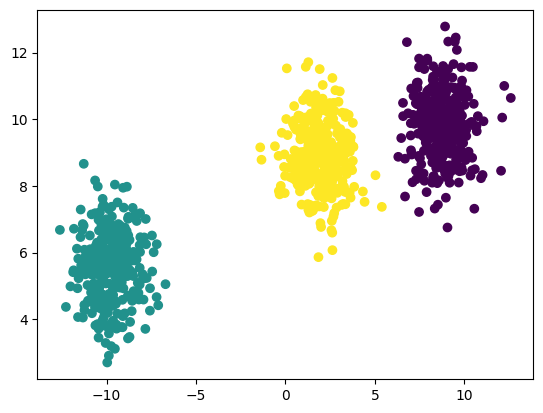

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
#Stndarsization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
#split train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)

In [13]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
from sklearn.cluster import KMeans

In [ ]:
#Elbow method to select k value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++') #k-means++ means centroid fiurther from eadch other
    kmeans.fit(X_test_scaled)
    wcss.append(kmeans.inertia_)
#inertia_ = WCSS = how tight the clusters are.
# This number is saved inside wcss.

In [28]:
wcss #kmeans.inertia_ = the WCSS value of that model.
#sharp drop in wcss means good within cluster sum of squares

[660.7754350428336,
 123.03447407276317,
 76.65195285825077,
 60.1359387206202,
 45.610884361215376,
 36.55216719714619,
 29.36775055269768,
 24.654149158027238,
 18.260033034759438,
 16.72947484750743]

Text(0, 0.5, 'WCSS')

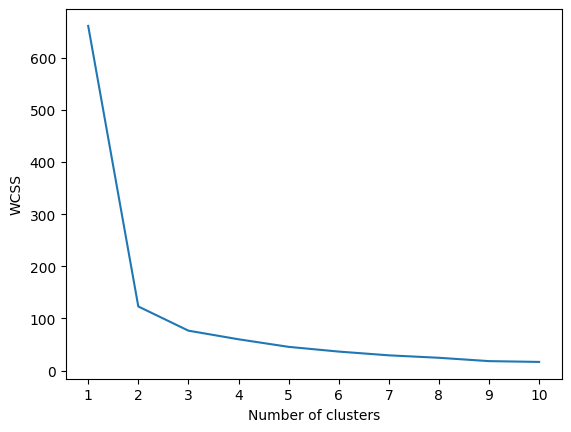

In [29]:
#plot elbow curvbe
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [39]:
kmeans=KMeans(n_clusters=k,init='k-means++') #k-means++ means centroid fiurther from eadch other
kmeans.fit(X_train_scaled)

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [36]:
y_pred=kmeans.predict(X_test_scaled)

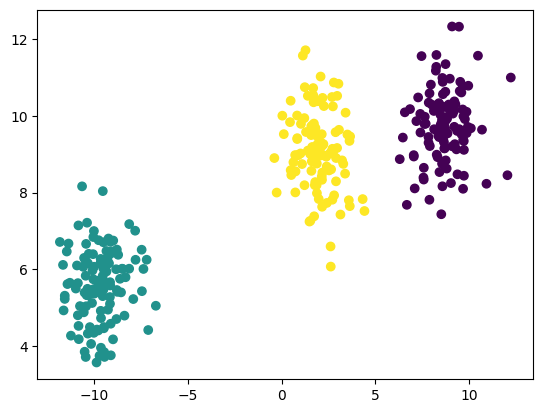

In [37]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

Imagine you want to group students into clusters.

Try different groups:

1 group → everyone together → big mess → high WCSS

2 groups → better

3 groups → even better

4 groups → improvement becomes smaller

After 5 groups → no big improvement

Where improvement slows = best k.